In [ ]:
# TO-DO

# Drive mapping!!! X DONE
# Random seed!!! X NOT FOUND
# Log scale X DONE
# Hungarian plot title X DONE

# Google Drive mapping

In [ ]:
# Run this if running in Google Collab
# Mount google drive if running from Google Collab
from google.colab import drive
drive.mount('/content/drive')

# Set current directory if running from Google Collab

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Output')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import packages

In [ ]:
!pip install matplotlib==3.1.1

     |████████████████████████████████| 13.1MB 215kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# %matplotlib inline

# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, cycler, python-dateutil, kiwisolver, pyparsing
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [ ]:
!pip3 install l2rpn_baselines
import grid2op

     |████████████████████████████████| 174kB 4.9MB/s 
     |████████████████████████████████| 11.7MB 14.0MB/s 
     |████████████████████████████████| 9.5MB 13.1MB/s 
     |████████████████████████████████| 5.8MB 23.0MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 153kB 51.1MB/s 
     |████████████████████████████████| 3.2MB 25.6MB/s 
  Created wheel for l2rpn-baselines: filename=l2rpn_baselines-0.5.1-cp37-none-any.whl size=246282 sha256=2e9d93c61f0e69fbe04283df6b5b2652026f4b3bee82411f8af346495c2a213e
  Stored in directory: /root/.cache/pip/wheels/ba/c0/fc/2d79824b69e903348a57ddbbb841b4ec2d9c3ebe936d2177f7
  Created wheel for grid2op: filename=Grid2Op-1.5.2-cp37-none-any.whl size=11953700 sha256=d353f9a85c952465cfa676dad8af7f94a9f03bbc19da87241ffb0d738e622fdd
  Stored in directory: /root/.cache/pip/wheels/c1/a2/11/ae011868969f9997cc4fd23997fa55671cd49297986c40e7f6
  Created wheel for pandapower: filename=pandapower-2.6.0-cp37-none-an

# Create environment

In [ ]:
env = grid2op.make()

/usr/local/lib/python3.7/dist-packages/grid2op/MakeEnv/Make.py:329: UserWarning: It is the first time you use the environment "rte_case14_realistic".
We will attempt to download this environment from remote
  warnings.warn(_MAKE_FIRST_TIME_WARN.format(dataset_name))
rte_case14_realistic.tar.bz2: 0.00B [00:00, ?B/s]

downloading the training data, this may take a while.


rte_case14_realistic.tar.bz2: 292MB [00:21, 13.6MB/s]                           


Extract the tar archive in "/root/data_grid2op"
You may now use the environment "rte_case14_realistic" with the available data by invoking:
	env = grid2op.make("rte_case14_realistic")


# LeapNet parameters

In [ ]:
from l2rpn_baselines.DuelQLeapNet.LeapNet_NNParam import LeapNet_NNParam

In [ ]:
sizes = [512, 512, 256, 256]

In [ ]:
li_attr_obs_X = ["day_of_week", "hour_of_day", "minute_of_hour", "prod_p", "prod_v", "load_p", "load_q",
                     "actual_dispatch", "target_dispatch"]

In [ ]:
x_dim = LeapNet_NNParam.get_obs_size(env, li_attr_obs_X)

In [ ]:
li_attr_obs_Tau = ["topo_vect", "time_before_cooldown_line", "time_before_cooldown_sub",
                       "timestep_overflow", "line_status", "rho"]

In [ ]:
tau_dims = [LeapNet_NNParam.get_obs_size(env, [el]) for el in li_attr_obs_Tau]

In [ ]:
 kwargs_archi = {'sizes': sizes,
                        'activs': ["relu" for _ in sizes],
                        'x_dim': x_dim,
                        'tau_dims': tau_dims,
                        'tau_adds': [0.0 for _ in range(len(tau_dims))],  # add some value to taus
                        'tau_mults': [1.0 for _ in range(len(tau_dims))],  # divide by some value for tau (after adding)
                        "list_attr_obs": li_attr_obs_X,
                        "list_attr_obs_tau": li_attr_obs_Tau
                        }

# LeapNet Experiment

In [ ]:
# Import relevant modules
from l2rpn_baselines.DuelQLeapNet import train
from l2rpn_baselines.DuelQLeapNet import evaluate

In [ ]:
# Set parameters
eval_nb_episode = 10 # TO-DO: Modify this!!
eval_max_steps = -1 #-1 # TO-DO: Modify this!! -1 means no constraint!
train_iters = [500000] # TO-DO: Modify this!![10, 20, 30] #
# train_iter = 50
# network_sizes = [64, 128 ,256, 512]

In [ ]:
# Initialize object to store experiment results
leapnet_experiment_results = np.zeros((eval_nb_episode, len(train_iters)))

In [ ]:
for i in range(len(train_iters)):
  
  leapnet_base_save_path = "./leapnet_trained_models_{}".format(i)

  # Update sizes
  # sizes = [network_sizes[i], network_sizes[i], network_sizes[i]/2, network_sizes[i]/2]
  # kwargs_archi['sizes'] = sizes

  env.reset()

  # Train the model
  train(env, iterations=train_iters[i], kwargs_archi=kwargs_archi, save_path=leapnet_base_save_path)

  env.reset()

  # Evaluate the model
  eval_results = evaluate(env, nb_episode=eval_nb_episode, verbose=False,
                          load_path=leapnet_base_save_path, max_steps=eval_max_steps)
  
  # Extract the cumulative rewards from the results object
  scores = [tmp[2] for tmp in eval_results[1]]

  # Assign current score to the actual output array
  leapnet_experiment_results[:,i] = scores

100%|██████████| 500000/500000 [7:38:10<00:00, 18.19it/s]


In [ ]:
leapnet_means = np.mean(leapnet_experiment_results, axis = 0)
leapnet_stds = np.std(leapnet_experiment_results, axis = 0)
confidence_level_param = 1.96
leapnet_ci = confidence_level_param*leapnet_stds / np.sqrt(eval_nb_episode)

NameError: ignored

# DoubleDuelingDQN Experiment

In [ ]:
# Import relevant modules
from l2rpn_baselines.DoubleDuelingDQN import train
from l2rpn_baselines.DoubleDuelingDQN import evaluate

In [ ]:
# Initialize object to store experiment results
ddqqn_experiment_results = np.zeros((eval_nb_episode, len(train_iters)))

# Set parameters


In [ ]:
for i in range(len(train_iters)):

  dddqn_base_save_path = "./dddqn_trained_models_{}".format(i)

  env.reset()

  # Train the model
  train(env, iterations=train_iters[i], save_path=dddqn_base_save_path, verbose=False)

  env.reset()

  # Evaluate the model
  eval_results = evaluate(env, nb_episode=eval_nb_episode, verbose=False,
                          load_path=dddqn_base_save_path + "/DoubleDuelingDQN.h5", max_steps=eval_max_steps)
  
  # Extract the cumulative rewards from the results object
  scores = [tmp[2] for tmp in eval_results]

  # Assign current score to the actual output array
  ddqqn_experiment_results[:,i] = scores

Successfully saved model at: ./dddqn_trained_models_0/DoubleDuelingDQN.h5
Successfully loaded network from: ./dddqn_trained_models_0/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_1/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_1/DoubleDuelingDQN.h5
Successfully loaded network from: ./dddqn_trained_models_1/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at: ./dddqn_trained_models_2/DoubleDuelingDQN.h5
Successfully saved model at:

In [ ]:
ddqqn_experiment_results

In [ ]:
# Preprocess results
dddqn_means = np.mean(ddqqn_experiment_results, axis = 0)
dddqn_stds = np.std(ddqqn_experiment_results, axis = 0)

confidence_level_param = 1.96
dddqn_ci = confidence_level_param*dddqn_stds / np.sqrt(eval_nb_episode)

# DoubleDuelingRDQN Experiment

In [ ]:
# Import relevant modules
from l2rpn_baselines.DoubleDuelingRDQN import train
from l2rpn_baselines.DoubleDuelingRDQN import evaluate

In [ ]:
# Initialize object to store experiment results
dddrqn_experiment_results = np.zeros((eval_nb_episode, len(train_iters)))

# Set parameters


# https://stackoverflow.com/questions/60948259/assertionerror-some-objects-had-attributes-which-were-not-restored
# Loadpath error was resolved using the idea above!

In [ ]:
for i in range(len(train_iters)):

  dddrqn_base_save_path = "./dddrqn_trained_models_{}".format(i)

  env.reset()

  # Train the model
  train(env, iterations=train_iters[i], save_path=dddrqn_base_save_path, verbose=False)

  env.reset()
  
  # Evaluate the model
  eval_results = evaluate(env, nb_episode=eval_nb_episode, verbose=False,
                          load_path=dddrqn_base_save_path + "/DoubleDuelingRDQN.tf", max_steps=eval_max_steps)
  
  # Extract the cumulative rewards from the results object
  scores = [tmp[2] for tmp in eval_results]

  # Assign current score to the actual output array
  dddrqn_experiment_results[:,i] = scores

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

Successfully saved model at: ./dddrqn_trained_models_0/DoubleDuelingRDQN.tf
Successfully loaded network from: ./dddrqn_trained_models_0/DoubleDuelingRDQN.tf


/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

Successfully saved model at: ./dddrqn_trained_models_1/DoubleDuelingRDQN.tf


/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/DoubleDuelingRDQN/ExperienceBuffer.py:26: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

Successfully saved model at: ./dddrqn_trained_models_1/DoubleDuelingRDQN.tf
Successfully loaded network from: ./dddrqn_trained_models_1/DoubleDuelingRDQN.tf


KeyboardInterrupt: ignored

In [ ]:
dddrqn_experiment_results

In [ ]:
# Preprocess results
dddrqn_means = np.mean(dddrqn_experiment_results, axis = 0)
dddrqn_stds = np.std(dddrqn_experiment_results, axis = 0)

confidence_level_param = 1.96
dddrqn_ci = confidence_level_param*dddrqn_stds / np.sqrt(eval_nb_episode)

In [ ]:
dddrqn_stds

# DoNothing Experiment

In [ ]:
#from l2rpn_baselines.DoNothing import eval_donothing

In [ ]:
import eval_donothing

In [ ]:
# Initialize object to store experiment results
donothing_experiment_results = np.zeros((eval_nb_episode, len(train_iters)))

In [ ]:
#res = eval_donothing.evaluate(env, nb_episode=10, max_steps = 2)

In [ ]:
# res = eval_donothing.evaluate(env, nb_episode=num_eval_iter, max_steps = 2)

for i in range(len(train_iters)):

  env.reset()

  # Evaluate the model
  eval_results = eval_donothing.evaluate(env, nb_episode=eval_nb_episode, max_steps = eval_max_steps)
  
  # Extract the cumulative rewards from the results object
  scores = [tmp[2] for tmp in eval_results]

  # Assign current score to the actual output array
  donothing_experiment_results[:,i] = scores

episode: 100%|██████████| 10/10 [08:33<00:00, 51.38s/it]


Evaluation summary:
chronics at: 000	total reward: 888427.500000	time steps: 799/8064
chronics at: 001	total reward: 1485025.625000	time steps: 1381/8064
chronics at: 002	total reward: 1189366.750000	time steps: 1095/8064
chronics at: 003	total reward: 908875.187500	time steps: 810/8064
chronics at: 004	total reward: 911823.000000	time steps: 801/8064
chronics at: 005	total reward: 456753.625000	time steps: 382/8064
chronics at: 006	total reward: 1804255.875000	time steps: 1665/8064
chronics at: 007	total reward: 1189012.625000	time steps: 1099/8064
chronics at: 008	total reward: 1191340.875000	time steps: 1091/8064
chronics at: 009	total reward: 3158590.750000	time steps: 2822/8064


episode: 100%|██████████| 10/10 [09:06<00:00, 54.62s/it]


Evaluation summary:
chronics at: 000	total reward: 888427.500000	time steps: 799/8064
chronics at: 001	total reward: 1485025.625000	time steps: 1381/8064
chronics at: 002	total reward: 1189366.750000	time steps: 1095/8064
chronics at: 003	total reward: 908875.187500	time steps: 810/8064
chronics at: 004	total reward: 911823.000000	time steps: 801/8064
chronics at: 005	total reward: 456753.625000	time steps: 382/8064
chronics at: 006	total reward: 1804255.875000	time steps: 1665/8064
chronics at: 007	total reward: 1189012.625000	time steps: 1099/8064
chronics at: 008	total reward: 1191340.875000	time steps: 1091/8064
chronics at: 009	total reward: 3158590.750000	time steps: 2822/8064


episode: 100%|██████████| 10/10 [09:42<00:00, 58.22s/it]


Evaluation summary:
chronics at: 000	total reward: 888427.500000	time steps: 799/8064
chronics at: 001	total reward: 1485025.625000	time steps: 1381/8064
chronics at: 002	total reward: 1189366.750000	time steps: 1095/8064
chronics at: 003	total reward: 908875.187500	time steps: 810/8064
chronics at: 004	total reward: 911823.000000	time steps: 801/8064
chronics at: 005	total reward: 456753.625000	time steps: 382/8064
chronics at: 006	total reward: 1804255.875000	time steps: 1665/8064
chronics at: 007	total reward: 1189012.625000	time steps: 1099/8064
chronics at: 008	total reward: 1191340.875000	time steps: 1091/8064
chronics at: 009	total reward: 3158590.750000	time steps: 2822/8064


Streaming output truncated to the last 5000 lines.
episode: 100%|██████████| 10/10 [11:46<00:00, 70.68s/it]

Evaluation summary:
chronics at: 000	total reward: 888427.500000	time steps: 799/8064
chronics at: 001	total reward: 1485025.625000	time steps: 1381/8064
chronics at: 002	total reward: 1189366.750000	time steps: 1095/8064
chronics at: 003	total reward: 908875.187500	time steps: 810/8064
chronics at: 004	total reward: 911823.000000	time steps: 801/8064
chronics at: 005	total reward: 456753.625000	time steps: 382/8064
chronics at: 006	total reward: 1804255.875000	time steps: 1665/8064
chronics at: 007	total reward: 1189012.625000	time steps: 1099/8064
chronics at: 008	total reward: 1191340.875000	time steps: 1091/8064
chronics at: 009	total reward: 3158590.750000	time steps: 2822/8064


In [ ]:
# Preprocess results
donothing_means = np.mean(donothing_experiment_results, axis = 0)
donothing_stds = np.std(donothing_experiment_results, axis = 0)

confidence_level_param = 1.96
donothing_ci = confidence_level_param*donothing_stds / np.sqrt(eval_nb_episode)

# Generate figures and export results

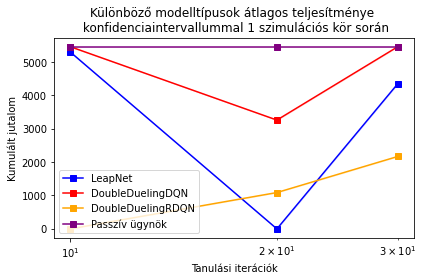

In [ ]:
ax = plt.axes()
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.plot(train_iters, leapnet_means, color='b', marker="s", label="LeapNet")
plt.fill_between(train_iters, (leapnet_means-leapnet_ci), (leapnet_means+leapnet_ci), color='b', alpha=.1)

plt.plot(train_iters, dddqn_means, color='r', marker="s", label="DoubleDuelingDQN")
plt.fill_between(train_iters, (dddqn_means-dddqn_ci), (dddqn_means+dddqn_ci), color='r', alpha=.1)

plt.plot(train_iters, dddrqn_means, color='orange', marker="s", label="DoubleDuelingRDQN")
plt.fill_between(train_iters, (dddrqn_means-dddrqn_ci), (dddrqn_means+dddrqn_ci), color='orange', alpha=.1)

plt.plot(train_iters, donothing_means, color='purple', marker="s", label="Passzív ügynök")
plt.fill_between(train_iters, (donothing_means-donothing_ci), (donothing_means+donothing_ci), color='purple', alpha=.1)

plt.xscale('log')
plt.legend(loc='lower left')
plt.xlabel("Tanulási iterációk")
plt.ylabel('Kumulált jutalom')
#plt.title(f"Average performance of different model variants \n with confidence interval from {eval_nb_episode} simulation rounds")
plt.title(f"Különböző modelltípusok átlagos teljesítménye \n konfidenciaintervallummal {eval_nb_episode} szimulációs kör során")

plt.tight_layout()
plt.savefig("train_iter_experiment_results.pdf", dpi = 100, bbox_inches='tight')
plt.savefig("train_iter_experiment_results.png", dpi = 100, bbox_inches='tight')
plt.show()

# Plot with different x axis

ValueError: ignored

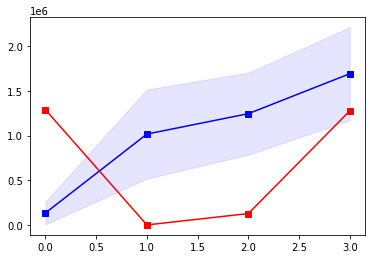

In [ ]:
custom_x = np.arange(len(train_iters))

plt.plot(custom_x, leapnet_means, color='b', marker="s", label="LeapNet")
plt.fill_between(custom_x, (leapnet_means-leapnet_ci), (leapnet_means+leapnet_ci), color='b', alpha=.1)

plt.plot(custom_x, dddqn_means, color='r', marker="s", label="DoubleDuelingDQN")
plt.fill_between(custom_x, (dddqn_means-dddqn_ci), (dddqn_means+dddqn_ci), color='r', alpha=.1)

plt.plot(custom_x, dddrqn_means, color='orange', marker="s", label="DoubleDuelingRDQN")
plt.fill_between(custom_x, (dddrqn_means-dddrqn_ci), (dddrqn_means+dddrqn_ci), color='orange', alpha=.1)

plt.plot(custom_x, donothing_means, color='purple', marker="s", label="Passzív ügynök")
plt.fill_between(custom_x, (donothing_means-donothing_ci), (donothing_means+donothing_ci), color='purple', alpha=.1)

#plt.xscale('log')
plt.legend(loc='lower left')
plt.xlabel("Tanulási iterációk")
plt.ylabel('Kumulált jutalom')
plt.xticks(custom_x, train_iters)
#plt.title(f"Average performance of different model variants \n with confidence interval from {eval_nb_episode} simulation rounds")
plt.title(f"Különböző modelltípusok átlagos teljesítménye \n konfidenciaintervallummal {eval_nb_episode} szimulációs kör során")


plt.tight_layout()
plt.savefig("train_iter_experiment_results.pdf", dpi = 100, bbox_inches='tight')
plt.savefig("train_iter_experiment_results.png", dpi = 100, bbox_inches='tight')
plt.show()

# Support

In [ ]:
# del plt.ylabel
# !pip show matplotlib

In [ ]:
leapnet_experiment_results

array([[-1.00000000e+01,  5.87926688e+05,  5.93819562e+05,
         8.89399000e+05],
       [ 1.35096109e+05,  8.92581812e+05,  1.48216775e+06,
         1.48594425e+06],
       [ 5.85588438e+05,  5.93097625e+05,  8.93012188e+05,
         2.61129150e+06],
       [-1.00000000e+01,  5.98018438e+05,  9.06018688e+05,
         2.77985250e+06],
       [-1.00000000e+01,  9.07585562e+05,  9.11810125e+05,
         9.11815062e+05],
       [-1.00000000e+01,  4.52490344e+05,  4.55713875e+05,
         5.90367938e+05],
       [ 4.57623500e+05,  1.79978150e+06,  1.79699950e+06,
         1.80520962e+06],
       [-1.00000000e+01,  5.91548688e+05,  1.18713700e+06,
         1.47737338e+06],
       [-1.00000000e+01,  5.93662812e+05,  1.06162050e+06,
         1.19227175e+06],
       [ 1.86402844e+05,  3.15470050e+06,  3.15854050e+06,
         3.16047125e+06]])

In [ ]:
leapnet_means

array([ 136465.0890625, 1017139.396875 , 1244683.96875  , 1690399.625    ])

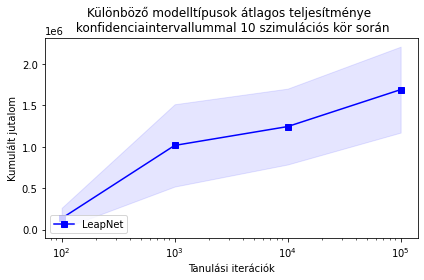

In [ ]:

plt.plot(train_iters, leapnet_means, color='b', marker="s", label="LeapNet")
plt.fill_between(train_iters, (leapnet_means-leapnet_ci), (leapnet_means+leapnet_ci), color='b', alpha=.1)

plt.xscale('log')
plt.legend(loc='lower left')
plt.xlabel("Tanulási iterációk")
plt.ylabel('Kumulált jutalom')
#plt.title(f"Average performance of different model variants \n with confidence interval from {eval_nb_episode} simulation rounds")
plt.title(f"Különböző modelltípusok átlagos teljesítménye \n konfidenciaintervallummal {eval_nb_episode} szimulációs kör során")

plt.tight_layout()
plt.show()

In [ ]:
ddqqn_experiment_results

array([[ 888427.25      ,    3256.02954102,  127261.1953125 ,
         887421.4375    ],
       [1193031.75      ,    3273.85546875,  128323.1171875 ,
        1194735.125     ],
       [1186567.625     ,    3266.37207031,  130252.0390625 ,
        1188309.        ],
       [ 906974.1875    ,    3334.78857422,  131100.765625  ,
         908767.6875    ],
       [ 911822.375     ,    3362.37011719,  131805.625     ,
         910752.625     ],
       [ 456753.28125   ,    3300.74243164,  129455.7890625 ,
         456716.0625    ],
       [1806231.125     ,    3299.87548828,  131754.828125  ,
        1803152.        ],
       [1186224.25      ,    3244.91503906,  126554.1640625 ,
        1187913.625     ],
       [1191339.625     ,    3269.828125  ,  128623.953125  ,
        1063427.375     ],
       [3158581.5       ,    3359.20043945,  134831.53125   ,
        3158224.        ]])

In [ ]:
dddqn_means

array([1288595.296875  ,    3296.79772949,  129996.30078125,
       1275941.89375   ])